In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
model_name = "esm1b_t33_650M_UR50S"
# result_df = pd.read_csv(home_dir+"models/esm_rives/outputs/predictions_esm1_t6_43M_UR50S.csv", sep="\t")
result_df = pd.read_csv(home_dir+f"models/esm_rives/outputs/popu_freq_preds_{model_name}_(mt-wt).csv", sep="\t")
print(result_df.shape)
result_df[result_df["mt_freq"]==0.0]

(95324, 14)


,snp_id,chrom_acc_version,chrom_pos,ref_allele,alt_allele,prot_acc_version,prot_pos,wt,mut,wt_population,mut_poulation,wt_freq,mt_freq,pred


In [4]:
# normalization effect check: does not effect in the rank correlation at all
print(result_df["mt_freq"].min(), result_df["mt_freq"].max())
processed_result_df = result_df.copy()
processed_result_df["mt_freq"]=(result_df["mt_freq"]-result_df["mt_freq"].min())/(result_df["mt_freq"].max()-result_df["mt_freq"].min())
processed_result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

4.873223101026788e-06 0.5


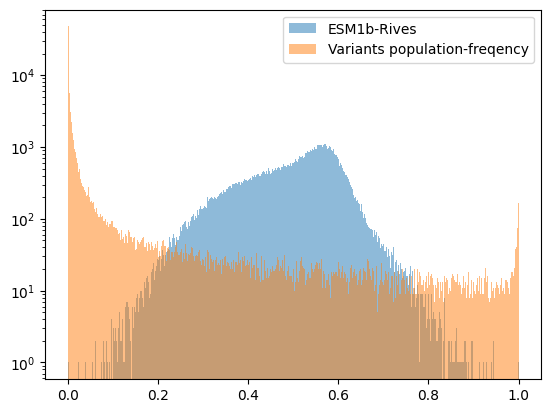

In [5]:
# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
# plt.hist(processed_result_df["pred"], bins, log=True, density=True, alpha=.5, label="ESM-Rives")
# plt.hist(processed_result_df["mt_freq"], bins, log=True, density=True, alpha=.5, label="Variants population-freqency")
plt.hist(processed_result_df["pred"], bins=500, log=True, alpha=.5, label="ESM1b-Rives")
plt.hist(processed_result_df["mt_freq"], bins=500, log=True, alpha=.5, label="Variants population-freqency")
plt.legend()
plt.show()

In [6]:
print(spearmanr(result_df["pred"], result_df["mt_freq"]))
print(pearsonr(result_df["pred"], result_df["mt_freq"]))

print(spearmanr(processed_result_df["pred"], processed_result_df["mt_freq"]))
print(pearsonr(processed_result_df["pred"], processed_result_df["mt_freq"]))

SignificanceResult(statistic=0.18158536492048985, pvalue=0.0)
PearsonRResult(statistic=0.1428013404673954, pvalue=0.0)
SignificanceResult(statistic=0.18158536492048985, pvalue=0.0)
PearsonRResult(statistic=0.1428013404673954, pvalue=0.0)
